In [1]:
# Gerekli Kütüphaneleri Yüklenmesi Yapılıyor
import numpy as np # linear algebra
import pandas as pd # veri işleme

#Görselleştirme Kütüphaneleri
import seaborn as sns
import matplotlib.pyplot as plt

#Makine öğrenmesi gereçleri
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

#Makine öğrenmesi algoritmaları
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Performans metrikleri
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

#Sistem kütüphaneleri
import os
import warnings

# Çıktılarda karmaşıklığa sebep olduğu için uyarılırı iptal ediyoruz
warnings.filterwarnings("ignore")
print(os.listdir("cikti"))

['winequality-red.csv']


In [2]:
#Veri setinin yüklemesi yapılıyor 
dataset=pd.read_csv("cikti/winequality-red.csv")
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Verisetindeki sütünların türkçeleştirilmesi
dataset.rename(columns = {"fixed acidity" : "Sabit Asit",
                          "volatile acidity" : "Uçucu Asitliği",
                          "citric acid" : "Sitrik Asit",
                          "residual sugar" : "Artık Şeker",
                          "chlorides" : "Klorürler",
                          "free sulfur dioxide" : "Serbest Sülfür Dioksit",
                          "total sulfur dioxide" : "Toplam Sülfür Dioksit",
                          "density" : "Yoğunluk",
                          "sulphates" : "Sülfatlar",
                          "alcohol" : "Alkol",
                          "quality" : "Kalite"   
                                  } , inplace = True)

In [4]:
#Verisetindeki ilk 5 veriyi ekrana yazdırma
dataset.head()

,Sabit Asit,Uçucu Asitliği,Sitrik Asit,Artık Şeker,Klorürler,Serbest Sülfür Dioksit,Toplam Sülfür Dioksit,Yoğunluk,pH,Sülfatlar,Alkol,Kalite
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Verisetindeki verilerin genel bilgileri
#Verisetimizde null değer bulunmamaktadır
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sabit Asit              1599 non-null   float64
 1   Uçucu Asitliği          1599 non-null   float64
 2   Sitrik Asit             1599 non-null   float64
 3   Artık Şeker             1599 non-null   float64
 4   Klorürler               1599 non-null   float64
 5   Serbest Sülfür Dioksit  1599 non-null   float64
 6   Toplam Sülfür Dioksit   1599 non-null   float64
 7   Yoğunluk                1599 non-null   float64
 8   pH                      1599 non-null   float64
 9   Sülfatlar               1599 non-null   float64
 10  Alkol                   1599 non-null   float64
 11  Kalite                  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Kaç farklı kalite puanı var 
print("Kalite puanları:",dataset['Kalite'].unique())

Kalite puanları: [5 6 7 4 8 3]


In [7]:
#Herbir kalite puanından kaçtane örnek var 
print(dataset['Kalite'].value_counts())

5    681
6    638
7    199
4     53
8     18
3     10
Name: Kalite, dtype: int64


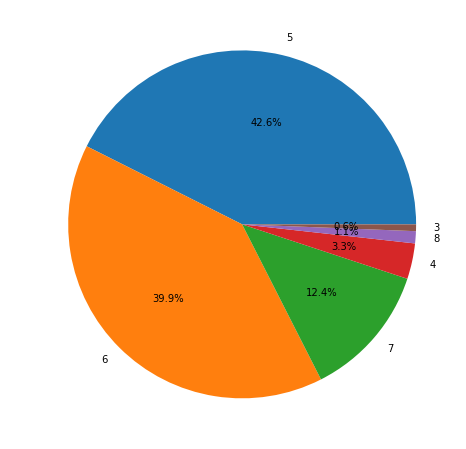

In [8]:
#kalite puanlarının dağılımının pie grafikle gösterimi
plt.figure(1, figsize=(8,8))
dataset['Kalite'].value_counts().plot.pie(autopct="%1.1f%%")
plt.ylabel(" ");

In [9]:
#Verisetindeki verilerin kaç tane olduğu, ortalaması, standart sapması, min ve max değerleri
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Sabit Asit,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
Uçucu Asitliği,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
Sitrik Asit,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
Artık Şeker,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
Klorürler,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
Serbest Sülfür Dioksit,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
Toplam Sülfür Dioksit,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
Yoğunluk,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
Sülfatlar,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
#Özelliklerin kalite puanları ile ilişkisini göstermek için kullanılacak grafik(point)
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    """
    dataset: Veri seti
    rows: Satır sayısı
    cols: sütün sayısı
    plot_type: Çizdirilecek grafik türü
    """
    
    #Veri setindeki sütünların isimleri alınıyor
    column_names=dataset.columns.values
    #Kaç tane sütün olduğu bulunuyor
    number_of_column=len(column_names)
    
    #Satır*sütün boyutlarında alt grafik içeren
    #matris oluşturuluyor. Matrisin genişliği:22 yüksekliği:16
    fig, axarr=plt.subplots(rows,cols, figsize=(22,16))

    counter=0# Çizimi yapılacak özelliğin column_names listesindeki indeks değerini tutuyor
    for i in range(rows):
        for j in range(cols):
            """
            i: satır numarasını tutuyor
            j: sütün numarasını tutuyor
            axarr[i][j]: Çizilen grafigin grafik matrisindeki yerini belirliyor
            """
            if 'point' in plot_type:
                sns.pointplot(x='Kalite',y=column_names[counter],data=dataset, ax=axarr[i][j])
                
            counter+=1
            if counter==(number_of_column-1,):
                break

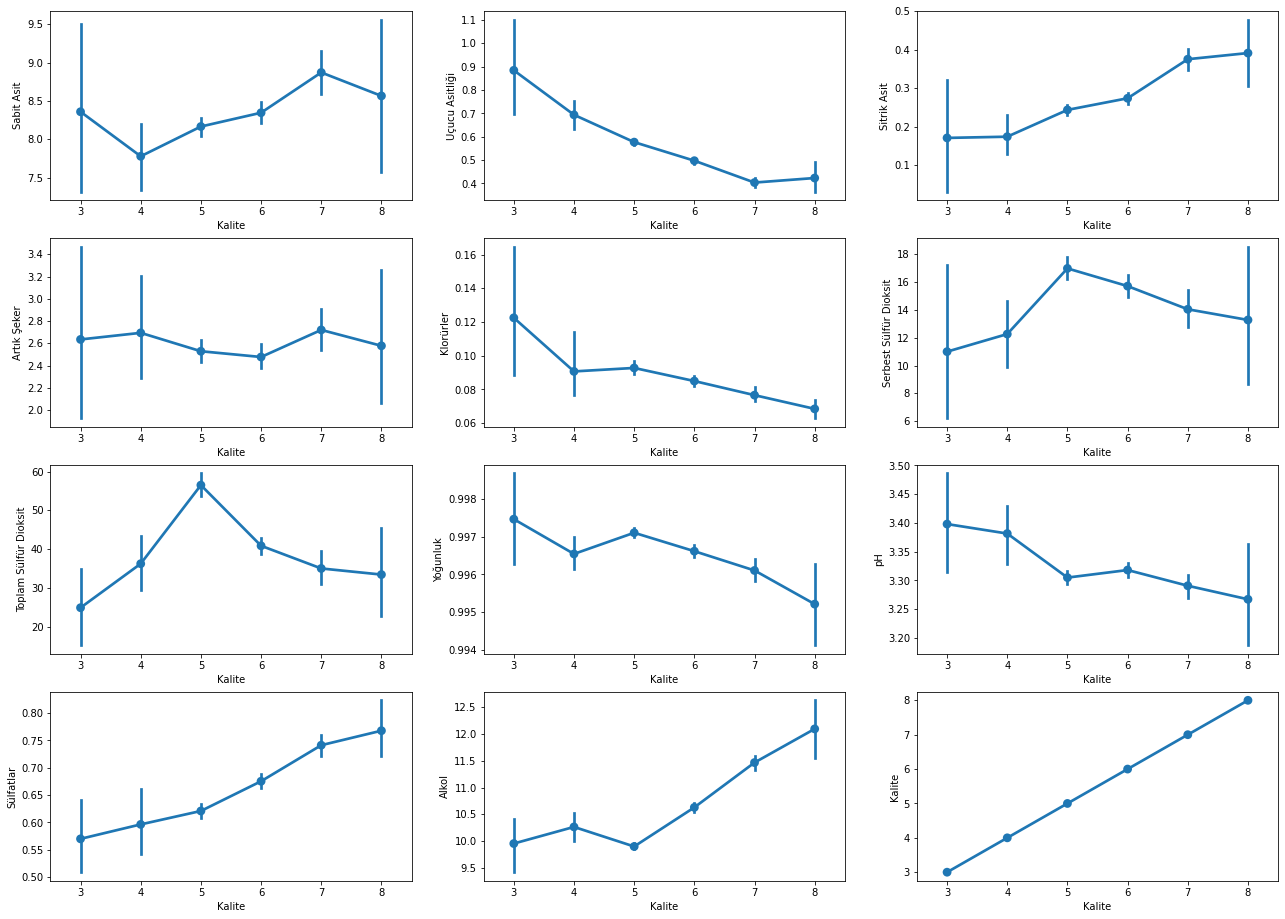

In [11]:
#Point türünde grafikler çiziliyor
draw_multivarient_plot(dataset,4,3,"point")

In [12]:
#Kullandğımız Algoritmalar
def get_models():
    models=[]
    models.append(("Logistic Regresyon",LogisticRegression()))
    models.append(("KNN",KNeighborsClassifier()))
    models.append(("SVM rbf",SVC()))
    
    return models

#Bütün algoritmalar için çapraz doğrulama fonksiyonu
def cross_validation_scores_for_various_ml_models(X_cv, y_cv):
    print("Çapraz Doğrulama Başarı Oranları".upper())
    models=get_models()


    results=[]
    names= []

    for name, model in models:
        kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=22)
        cv_result=cross_val_score(model,X_cv, y_cv, cv=kfold,scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        print("{} modelinin çapraz doğrulaması yapıldı, başarı oranı:{:0.2f}".format(name, cv_result.mean()))


In [13]:
#Bağımlı ve bağımsız değişkenlerin belirlenmesi
dataset_temp=dataset.copy(deep=True)
X=dataset.drop('Kalite', axis=1)
y=dataset['Kalite']

#Modeli eğitmeden önce özellikleri normalleştirmek
X=StandardScaler().fit_transform(X)

#Sonra çapraz doğrulama yapılıyor
cross_validation_scores_for_various_ml_models(X, y)

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
Logistic Regresyon modelinin çapraz doğrulaması yapıldı, başarı oranı:0.60
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.58
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.62


In [14]:
#Eğitim ve test verilerinin belirtilen ölçüde ayrılması
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#1279 satır 11 sütun       %80 eğitim için ayrılıyor
X_train.shape

(1279, 11)

In [16]:
#320 satır 11 sütun        %20 test için ayrılıyor
X_test.shape

(320, 11)

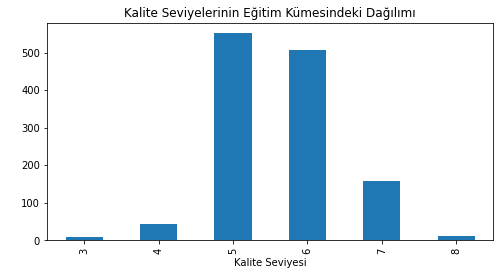

In [17]:
#Dağılımların görselleştirilmesi
y_frame=pd.DataFrame()
y_frame['Kalite Seviyesi']=y_train
y_frame.groupby(['Kalite Seviyesi']).size().plot.bar(figsize=(8,4),
                                                     title="Kalite Seviyelerinin Eğitim Kümesindeki Dağılımı")
plt.ylabel(" ");

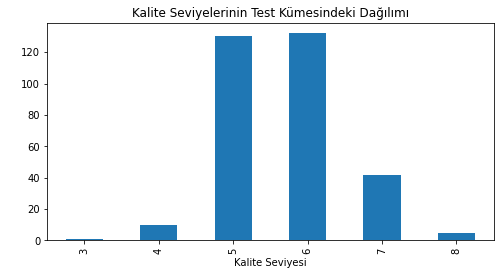

In [18]:
#Dağılımların görselleştirilmesi
y_frame=pd.DataFrame()
y_frame['Kalite Seviyesi']=y_test
y_frame.groupby(['Kalite Seviyesi']).size().plot.bar(figsize=(8,4),title="Kalite Seviyelerinin Test Kümesindeki Dağılımı")
plt.ylabel(" ");

In [19]:
def SVM_GridSearch(X_train, X_test, y_train, y_test):
    best_score=0
    gammas=[0.001, 0.01, 0.1, 1, 10, 100]
    Cs=[0.001, 0.01, 0.1, 1, 10, 100]
    
    for gamma in gammas:
        for C in Cs:
            svm=SVC(kernel='rbf',gamma=gamma, C=C)
            svm.fit(X_train, y_train)                    #eğitme
            
            
            score=svm.score(X_test, y_test)
            
            if score>best_score:
                y_pred=svm.predict(X_test)
                best_score=score
                best_params={'C':C, 'gamma':gamma}
        
    print("En İyi Sonuç:",best_score)
    print("En İyi Parametre:",best_params)
    print("Sınıflandırma Raporu:\n",classification_report(y_test, y_pred))

In [20]:
SVM_GridSearch(X_train, X_test, y_train, y_test)

En İyi Sonuç: 0.678125
En İyi Parametre: {'C': 100, 'gamma': 1}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.72      0.76      0.74       130
           6       0.63      0.72      0.67       132
           7       0.74      0.55      0.63        42
           8       0.00      0.00      0.00         5

    accuracy                           0.68       320
   macro avg       0.35      0.34      0.34       320
weighted avg       0.65      0.68      0.66       320



In [21]:
#Kalite sayısının 6'dan 3'e düşürülmesi
dataset_temp.loc[(dataset_temp['Kalite']==3),'Kalite']=1
dataset_temp.loc[(dataset_temp['Kalite']==4),'Kalite']=1

dataset_temp.loc[(dataset_temp['Kalite']==5),'Kalite']=2
dataset_temp.loc[(dataset_temp['Kalite']==6),'Kalite']=2

dataset_temp.loc[(dataset_temp['Kalite']==7),'Kalite']=3
dataset_temp.loc[(dataset_temp['Kalite']==8),'Kalite']=3

In [22]:
dataset_temp['Kalite'].value_counts()

2    1319
3     217
1      63
Name: Kalite, dtype: int64

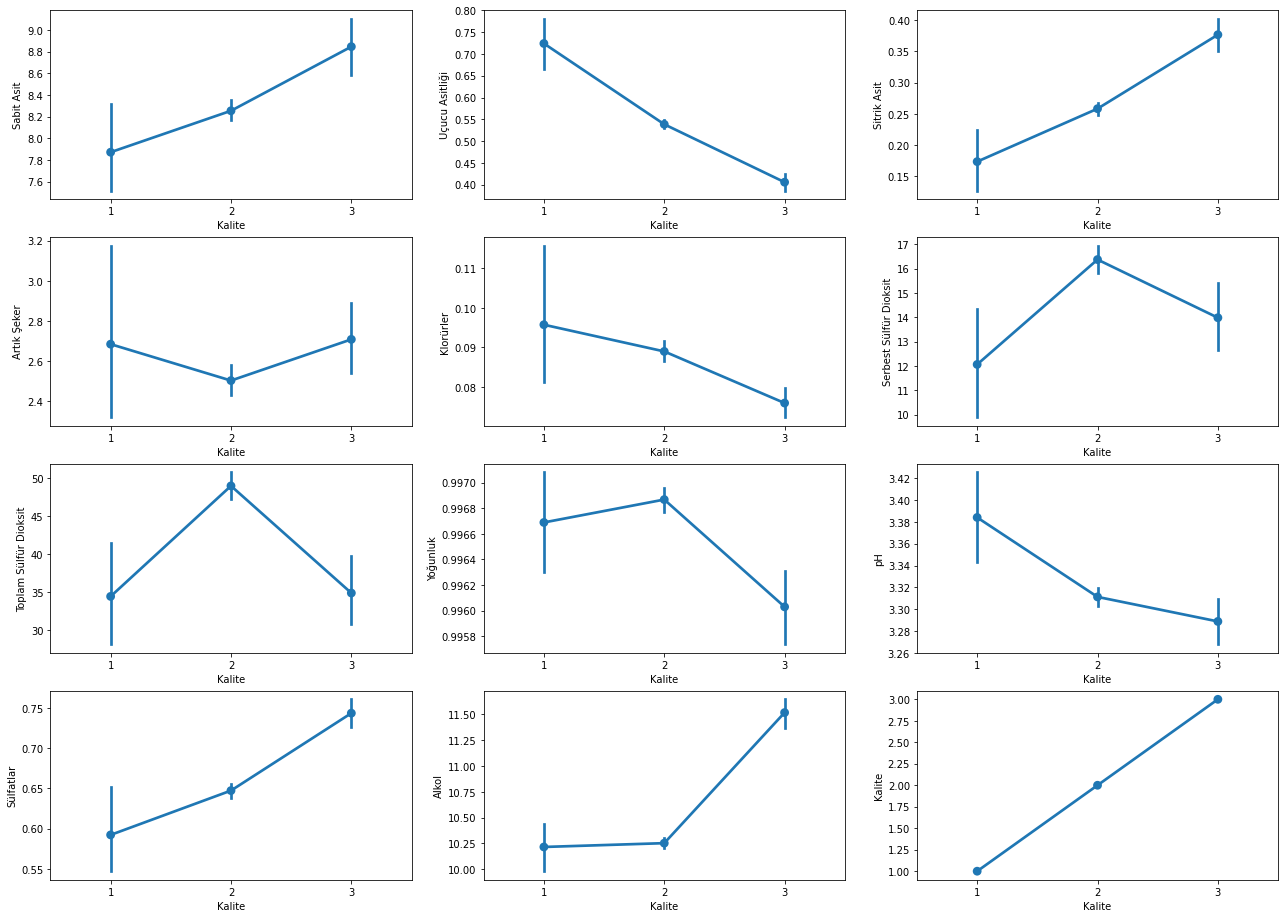

In [23]:
#Point Plot türünde grafik çizdiriliyor
draw_multivarient_plot(dataset_temp,4,3,"point")

In [24]:
X_temp=dataset_temp.drop('Kalite', axis=1)
y_temp=dataset_temp['Kalite']
X_temp=StandardScaler().fit_transform(X_temp)

In [25]:
X_train_temp, X_test_temp, y_train_temp, y_test_temp=train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

In [26]:
cross_validation_scores_for_various_ml_models(X_temp, y_temp)

ÇAPRAZ DOĞRULAMA BAŞARI ORANLARI
Logistic Regresyon modelinin çapraz doğrulaması yapıldı, başarı oranı:0.84
KNN modelinin çapraz doğrulaması yapıldı, başarı oranı:0.83
SVM rbf modelinin çapraz doğrulaması yapıldı, başarı oranı:0.85


In [27]:
SVM_GridSearch(X_train_temp, X_test_temp, y_train_temp, y_test_temp)

En İyi Sonuç: 0.875
En İyi Parametre: {'C': 10, 'gamma': 1}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.89      0.97      0.93       262
           3       0.81      0.53      0.64        47

    accuracy                           0.88       320
   macro avg       0.56      0.50      0.52       320
weighted avg       0.84      0.88      0.85       320

